# Importing the necessary libraries

In [200]:
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.pyplot as plt
import requests
import re


# Extracting Tesla stock using yfinance

In [143]:
#using Ticker TSLA for Tesla create a Ticker object
Tesla_stock=yf.Ticker("TSLA")
Tesla_stock=Tesla_stock.history(period="max")
Tesla_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [116]:
Tesla_stock.reset_index(inplace=True)


In [142]:
Tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Extracting Tesla Revenue Data using webscraping

In [118]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [119]:
Tesla_r=requests.get(url).text#Get the content of the web page
soup=BeautifulSoup(Tesla_r,"html5lib")#Creats BeautifulSoup object

In [141]:
Tesla_revenue_table=soup.find('table',class_='historical_data_table table')

In [120]:
# Extracting the quarterly revenue data
tesla_quarterly=soup.find_all('tbody')[1]
tesla_qrt_table=tesla_quarterly.find_all('tr')

In [199]:
cols=['Quarter','Revenue']
df_tes_qrt=pd.DataFrame(columns=cols)#crear empty dataframe

In [203]:
for row in tesla_qrt_table:
    row_data=row.find_all('td')
    individual_row_dta=[data.text for data in row_data]
    length=len(df_tes_qrt)
    df_tes_qrt.loc[length]=individual_row_dta
    

In [205]:
df_tes_qrt.tail()

,Quarter,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


In [144]:
df_tes_qrt['Revenue']=df_tes_qrt['Revenue'].str.replace('$','')
df_tes_qrt['Revenue']=df_tes_qrt['Revenue'].str.replace(',','')
df_tes_qrt['Revenue'].head()

C:\Users\tmihrete\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    21454
1    16934
2    18756
3    17719
4    13757
Name: Revenue, dtype: object


# Extracting  Tesla's annual revenue data

In [194]:
Tesla_rev_table=Tesla_revenue_table.find_all('tr')

In [195]:
cols=['year','Revenue']
df_Tesla_revenue=pd.DataFrame(columns=cols)
df_Tesla_revenue

,year,Revenue


In [196]:
for row in Tesla_rev_table[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text for data in row_data]
    length=len(df_Tesla_revenue)
    df_Tesla_revenue.loc[length]=individual_row_data

In [197]:
df_Tesla_revenue.head()

,year,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [198]:
df_Tesla_revenue['Revenue']=df_Tesla_revenue['Revenue'].str.replace("$","")
df_Tesla_revenue

C:\Users\tmihrete\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,year,Revenue
0,2021,"53,823"
1,2020,"31,536"
2,2019,"24,578"
3,2018,"21,461"
4,2017,"11,759"
5,2016,"7,000"
6,2015,"4,046"
7,2014,"3,198"
8,2013,"2,013"
9,2012,413


In [128]:
df_Tesla_revenue['Revenue']=df_Tesla_revenue['Revenue'].str.replace(",","")
df_Tesla_revenue['Revenue']=df_Tesla_revenue['Revenue'].astype('float')
df_Tesla_revenue['Revenue'].dtype

dtype('float64')

In [189]:
df_Tesla_revenue=df_Tesla_revenue.sort_values('year',ascending=True)
df_Tesla_revenue.head()

,year,Revenue
12,2009,112.0
11,2010,117.0
10,2011,204.0
9,2012,413.0
8,2013,2013.0


# Extracting GameStop Stock data using yfinance

In [206]:
#create a Ticker object for GameStop using "GME" Ticker
gme=yf.Ticker("GME")
gamestop_stock=gme.history(period="max")

In [207]:
gamestop_stock.reset_index(inplace=True)
gamestop_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Extracting GameStope revenue data using web scrapping

In [179]:
Url1="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


In [180]:
GME_r=requests.get(Url1).text#Get the content of the web page
soup=BeautifulSoup(GME_r,"html5lib")#Creats BeautifulSoup object

In [181]:
col=['Quarter','Revenue']
df_gme_qrt=pd.DataFrame(columns=col) #creats empty dataframe for quarterly revenue

In [182]:
df_gme_annual=df_gme_annual.sort_values('Year',ascending=True)

In [183]:
gme_rev_table=soup.find_all('table')
gme_rev_qrt=gme_rev_table[1]# gets the content of the quarterly revenue table
gme_rows=gme_rev_qrt.find_all('tr')
for row in gme_rows[1:]:
    col=row.find_all('td')
    cell_data=[data.text for data in col]
    length=len(df_gme_qrt)
    df_gme_qrt.loc[length]=cell_data

In [208]:
df_gme_qrt.tail()

,Quarter,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


In [185]:
df_gme_qrt['Revenue']=df_gme_qrt['Revenue'].str.replace("$","")
df_gme_qrt['Revenue']=df_gme_qrt['Revenue'].str.replace(",","")
df_gme_qrt['Revenue']=df_gme_qrt['Revenue'].astype('float')
df_gme_qrt['Revenue'].dtype

C:\Users\tmihrete\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('float64')

# Tesla Revenue and Stock dashboard

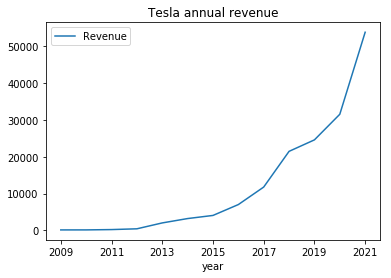

In [145]:
df_Tesla_revenue.plot('year','Revenue',title='Tesla annual revenue')

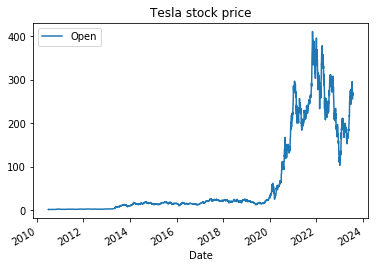

In [139]:
Tesla_stock.plot(x='Date',y='Open',title='Tesla stock price')

# GameStop stock and revenue dashboard

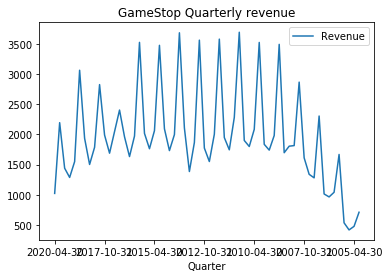

In [187]:
df_gme_qrt.plot(x='Quarter',y='Revenue',title='GameStop Quarterly revenue')

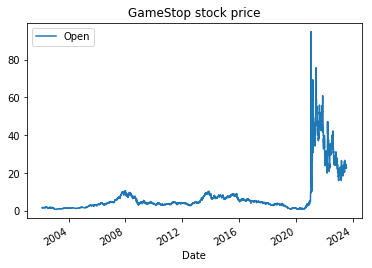

In [138]:
gamestop_stock.plot(x="Date",y="Open", title='GameStop stock price')